**1. Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [46]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import random

**2. Load Dataset**

In [75]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**3. Visualize data**

In [15]:
classes = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

Text(0.5, 1.0, 'T-shirt/top')

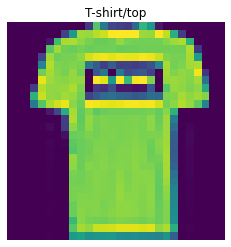

In [16]:
plt.imshow(X_train[1])
plt.axis('off')
plt.title(classes[y_train[1]])

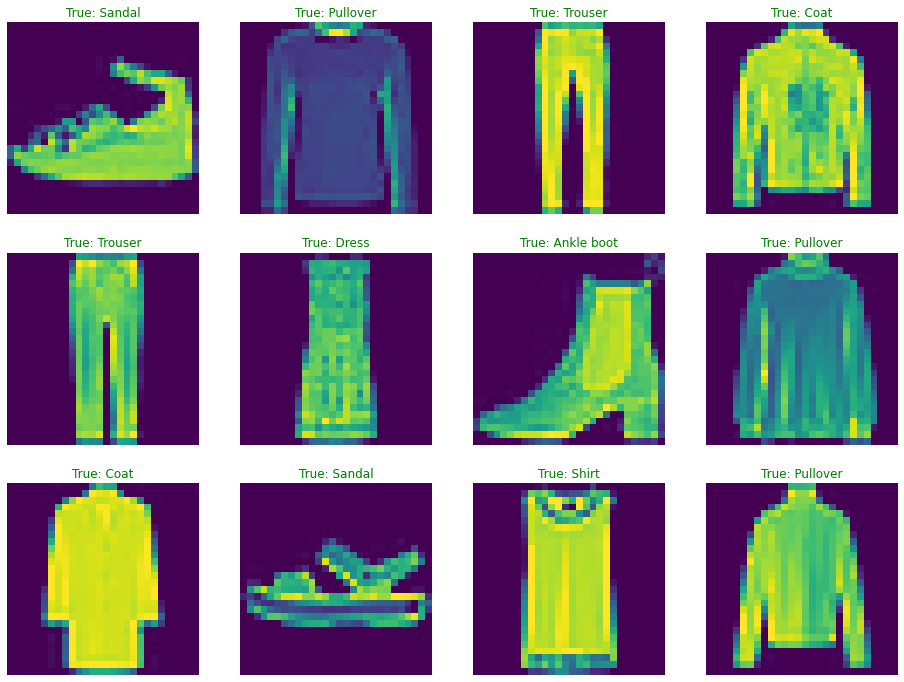

In [64]:
random.seed(28)

nrows, ncols = 3, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 12))

for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]

    img_idx = random.randint(0, X_train.shape[0])

    ax.imshow(X_train[img_idx])
    true_label_str = f"True: {classes[y_train[img_idx]]}"
    ax.set_title(true_label_str, color='green', fontsize=12)
    ax.axis('off')

plt.show()

**4. Data Normalization**
- Reshape các ảnh từ giá trị từ 0 đến 255 về [0, 1]
- Kiểu dữ liệu trong từng bức ảnh là `unit8` , bây giờ phải **scale** chúng về kiểu dữ liệu `float`

In [52]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

- Kích thước của `X_train` đang là (60000, 28, 28) trong đó:
> - 60000: Số lượng bức ảnh
> - 28x28: Kích thước bức ảnh

- Nhưng ảnh có thêm chiều `channels` nữa $\to$ phải **extend** cái `dimension` của `X_train` bằng lệnh `np.expand_dims`

*(Mặc dù ở đây là ảnh xám - grey-scale nhưng vẫn phải theo chiều quy định của Keras thì mới cho vào mô hình được)*

- `X_train.shape` mong muốn có kích thước là (60000, 28, 28, 1)

In [69]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, -1)

**5. One-hot Vector**

In [76]:
class_nums = 10
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [78]:
y_train_label[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

**6. Neural Network**

In [96]:
class NeuralNet:
    def __init__(self) -> None:
        self.model = keras.models.Sequential([
                    keras.layers.Flatten(input_shape=(28, 28, 1)),
                    keras.layers.Dense(units=512, activation='relu'),
                    keras.layers.Dense(units=256, activation='relu'),
                    keras.layers.Dense(class_nums, activation='softmax')
                ])
    
    def compile(self, optimize=None, loss=None, metrics=None):
        self.model.compile(
            optimizer=optimize,
            loss=loss,
            metrics=metrics
        )
    
    

In [97]:
model = NeuralNet()
model.model.summary()

Model: "sequential_2"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [101]:
history = model.model.fit(X_train, y_train_label, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2722 - accuracy: 0.8997 - val_loss: 0.3495 - val_accuracy: 0.8840
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2656 - accuracy: 0.9025 - val_loss: 0.3322 - val_accuracy: 0.8845
Epoch 3/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2627 - accuracy: 0.9043 - val_loss: 0.3775 - val_accuracy: 0.8778
Epoch 4/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2613 - accuracy: 0.9041 - val_loss: 0.3728 - val_accuracy: 0.8730
Epoch 5/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2556 - accuracy: 0.9071 - val_loss: 0.3702 - val_accuracy: 0.8758
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2561 - accuracy: 0.9059 - val_loss: 0.4074 - val_accuracy: 0.8710
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2490 - accuracy: 0.9076 - val_loss: 0.3657 - val_accuracy: 0.8835
Epoch 

In [104]:
his_dict = history.history
his_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [105]:
train_loss, val_loss = his_dict['loss'], his_dict['val_loss']
train_accurcy, val_accuracy = his_dict['accuracy'], his_dict['val_accuracy']

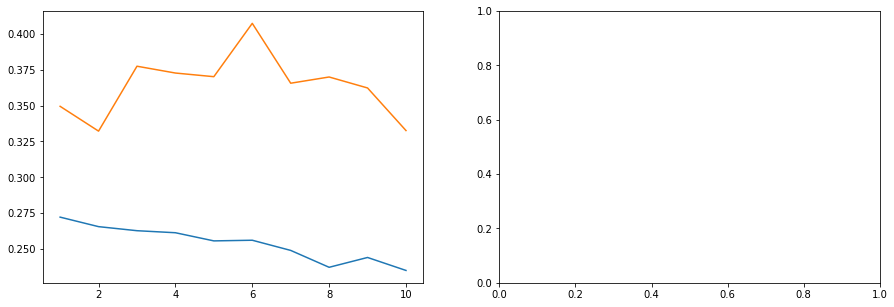

In [108]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
epoch_runs = [i+1 for i in range(10)]

ax1.plot(epoch_runs, train_loss, label='Train Loss')
ax1.plot(epoch_runs, val_loss, label='Validation Loss')

# plt.show()